In [1]:
"""
This Notebook takes a deeper dive into the spaces, and compares more quantities for occupation
"""

'\nThis Notebook takes a deeper dive into the spaces, and compares more quantities for occupation\n'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read parquet
df_occ_full = pd.read_parquet("occupancy_new_metric.parquet")

In [3]:
# Work with weeks days only to capture real trends
week_ends = pd.to_datetime(["2023-03-05", "2023-03-11"])
df_occ = df_occ_full[~df_occ_full["date_daily"].isin(week_ends)].copy() # Removes weekends
df_occ["date_daily"].unique()

<DatetimeArray>
['2023-03-06 00:00:00', '2023-03-07 00:00:00', '2023-03-08 00:00:00',
 '2023-03-09 00:00:00', '2023-03-10 00:00:00']
Length: 5, dtype: datetime64[ns]

In [4]:
# Max Occupation for each day per space
max_occ_time = df_occ.loc[df_occ.groupby(["building_name","space_name","date_daily"])["avg_occ"].idxmax(), 
       ["building_name","capacity","space_name","date_time","avg_occ"]].reset_index(drop=True)

In [5]:
# Extracting time of day of max occupation for each space
new_df_max_times = max_occ_time.copy()
new_df_max_times["hour_of_max_occupation"] = new_df_max_times["date_time"].dt.hour
mean_max_times = new_df_max_times.groupby(["building_name","space_name"])["hour_of_max_occupation"].mean()
time_of_max_occ = np.array(mean_max_times)
min_index = time_of_max_occ.argmin()
space = df_occ["space_name"].unique()[min_index] ## Empty Building
print(space) 

Space2_Building_9


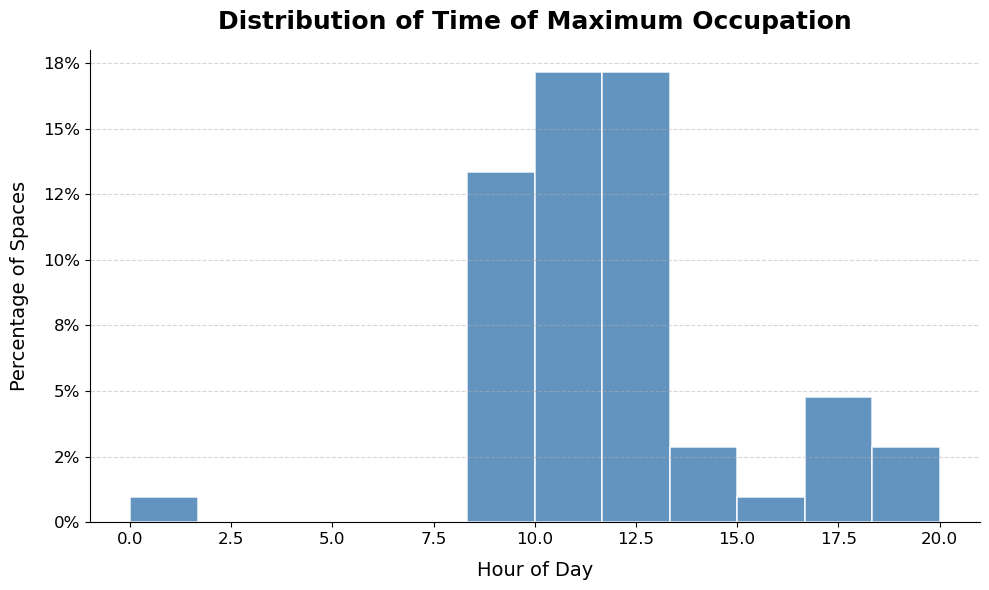

In [6]:
plt.figure(figsize=(10,6))

# Histogram normalized to percentages
plt.hist(
    time_of_max_occ,
    bins=12,                     # adjust bins to match your data resolution
    density=True,
    color="steelblue",
    edgecolor="white",
    linewidth=1.2,
    alpha=0.85
)

# Format y-axis as percentages
plt.gca().yaxis.set_major_formatter(lambda x, _: f"{x*100:.0f}%")

# Titles & labels
plt.title("Distribution of Time of Maximum Occupation", fontsize=18, fontweight="bold", pad=15)
plt.xlabel("Hour of Day", fontsize=14, labelpad=10)
plt.ylabel("Percentage of Spaces", fontsize=14, labelpad=10)

# Grid for readability
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Clean look
for spine in ["top", "right"]:
    plt.gca().spines[spine].set_visible(False)

plt.tight_layout()
plt.show()

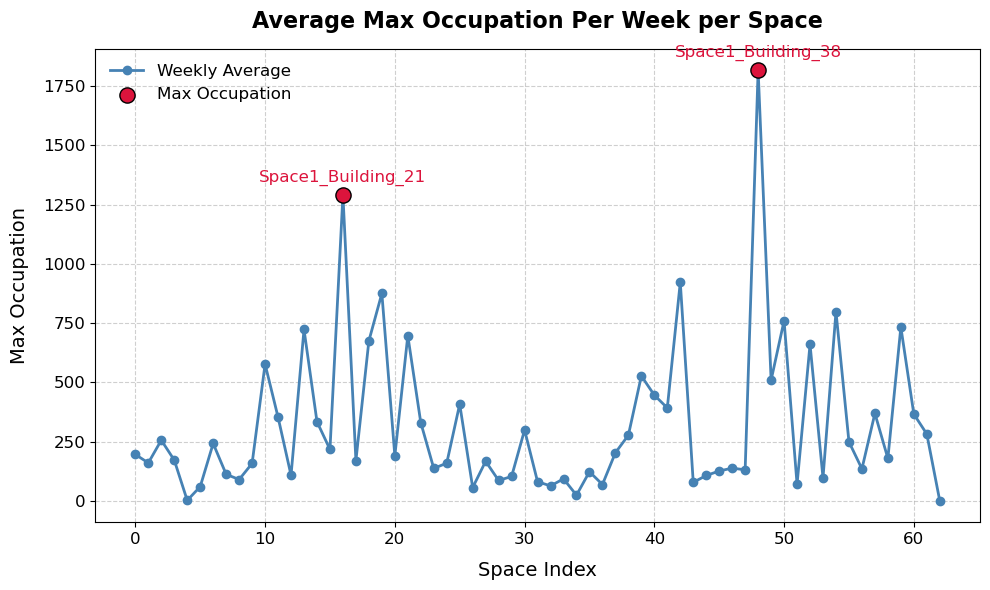

Spaces with max occupation: ['Space1_Building_21' 'Space1_Building_38']


In [7]:
# Averageing max occ for the week
avg_occ_week = max_occ_time.groupby(["building_name","space_name"])["avg_occ"].mean()
avg_occ_week = np.array(avg_occ_week).astype(int)
x = np.arange(avg_occ_week.size)
# Basic line plot
plt.figure(figsize=(10,6))
plt.plot(x, avg_occ_week, "-o", color="steelblue", linewidth=2, markersize=6, label="Weekly Average")

# Highlight max points
max_indices = [16, 48]
plt.scatter(
    [x[i] for i in max_indices],
    [avg_occ_week[i] for i in max_indices],
    color="crimson", s=120, zorder=5, edgecolors="black", label="Max Occupation"
)

# Titles and labels (clean, dashboard style)
plt.title("Average Max Occupation Per Week per Space", fontsize=16, fontweight="bold", pad=15)
plt.xlabel("Space Index", fontsize=14, labelpad=10)
plt.ylabel("Max Occupation", fontsize=14, labelpad=10)

# Grid and style
plt.grid(True, linestyle="--", alpha=0.6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Annotate max points with names
space_names = max_occ_time["space_name"].unique()
for i in max_indices:
    plt.annotate(
        space_names[i],
        (x[i], avg_occ_week[i]),
        textcoords="offset points",
        xytext=(0,10),
        ha="center",
        fontsize=12,
        fontweight="medium",
        color="crimson"
    )


# Legend and layout
plt.legend(frameon=False, fontsize=12)
plt.tight_layout()
plt.show()

print("Spaces with max occupation:", space_names[max_indices])

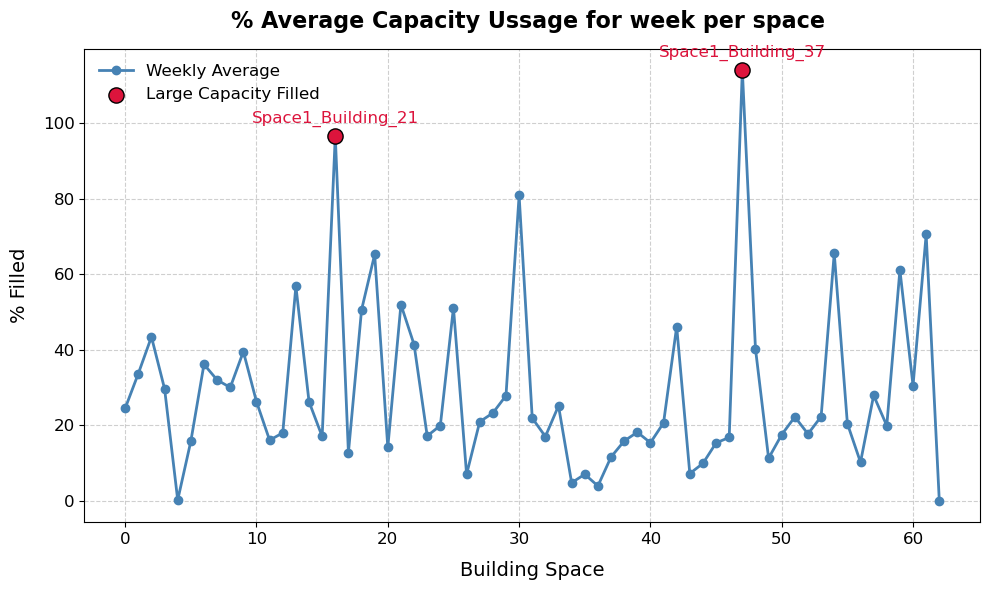

In [43]:
# Finds usage of each space relative to capacity

avg_occ_cape =(     
    max_occ_time
    .groupby(["building_name","space_name","capacity"])["avg_occ"]
    .mean()
    .reset_index()
)
cap = avg_occ_cape["capacity"]
percent_capacity_ussage = (avg_occ_week / cap)*100

x = np.arange(avg_occ_week.size)
# Basic line plot
plt.figure(figsize=(10,6))
plt.plot(x, percent_capacity_ussage, "-o", color="steelblue", linewidth=2, markersize=6, label="Weekly Average")


# Titles and labels (clean, dashboard style)
plt.title("% Average Capacity Ussage for week per space ", fontsize=16, fontweight="bold", pad=15)
plt.xlabel("Building Space", fontsize=14, labelpad=10)
plt.ylabel("% Filled", fontsize=14, labelpad=10)

# Grid and style
plt.grid(True, linestyle="--", alpha=0.6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

max_indices = [16, 47]
plt.scatter(
    [x[i] for i in max_indices],
    [percent_capacity_ussage[i] for i in max_indices],
    color="crimson", s=120, zorder=5, edgecolors="black", label="Large Capacity Filled"
)


# Annotate max points with names
space_names = max_occ_time["space_name"].unique()
for i in max_indices:
    plt.annotate(
        space_names[i],
        (x[i], percent_capacity_ussage[i]),
        textcoords="offset points",
        xytext=(0,10),
        ha="center",
        fontsize=12,
        fontweight="medium",
        color="crimson"
    )


# Legend and layout
plt.legend(frameon=False, fontsize=12)
plt.tight_layout()
plt.show()


In [44]:
# Investigating building of interest from plot
max_occ_time[max_occ_time["space_name"] == "Space1_Building_37"]

,building_name,capacity,space_name,date_time,avg_occ
235,Building_37,115,Space1_Building_37,2023-03-06 10:00:00,96
236,Building_37,115,Space1_Building_37,2023-03-07 10:00:00,127
237,Building_37,115,Space1_Building_37,2023-03-08 10:00:00,203
238,Building_37,115,Space1_Building_37,2023-03-09 11:00:00,181
239,Building_37,115,Space1_Building_37,2023-03-10 11:00:00,51


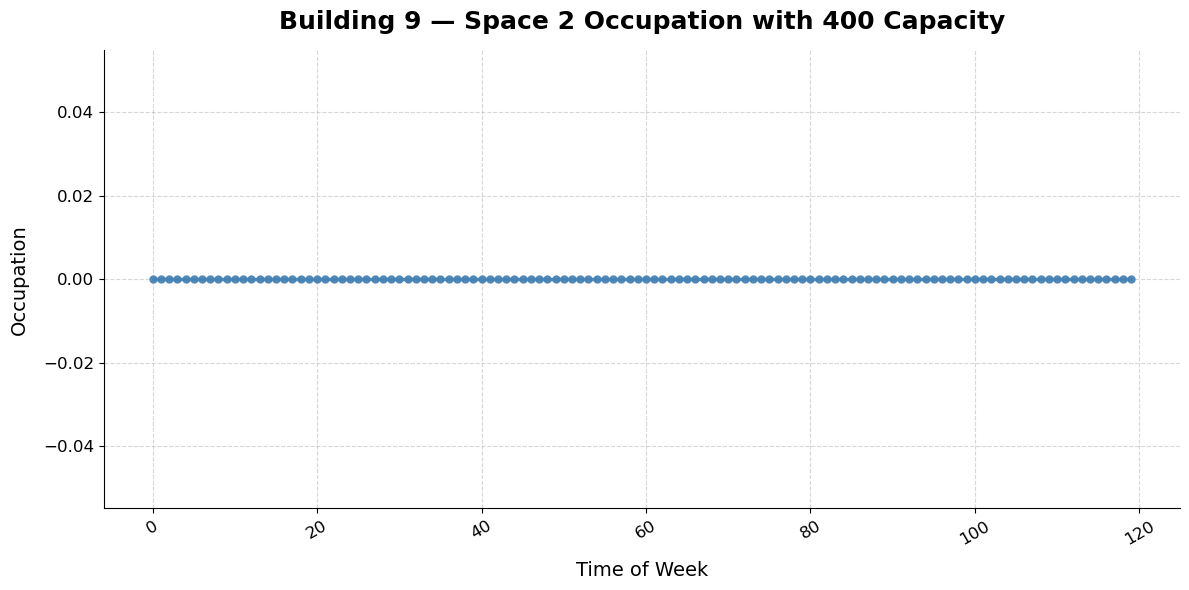

In [8]:
# Time series of Building Space 2 Building 9 

df_9 = df_occ[df_occ["space_name"]== space].reset_index(drop=True)
x = np.arange(df_9["avg_occ"].size)
y = (df_9["avg_occ"])
plt.figure(figsize=(12,6))

# Line plot with markers for clarity
plt.plot(x, y, color="steelblue", linewidth=2.5, marker="o", markersize=5, alpha=0.9)

# Titles & labels
plt.title("Building 9 — Space 2 Occupation with 400 Capacity", fontsize=18, fontweight="bold", pad=15)
plt.xlabel("Time of Week", fontsize=14, labelpad=10)
plt.ylabel("Occupation", fontsize=14, labelpad=10)

# Grid for readability
plt.grid(True, linestyle="--", alpha=0.5)

# Axis ticks
plt.xticks(fontsize=12, rotation=30)   # rotate if time labels overlap
plt.yticks(fontsize=12)

# Remove unnecessary spines for clean look
for spine in ["top", "right"]:
    plt.gca().spines[spine].set_visible(False)

plt.tight_layout()
plt.show()

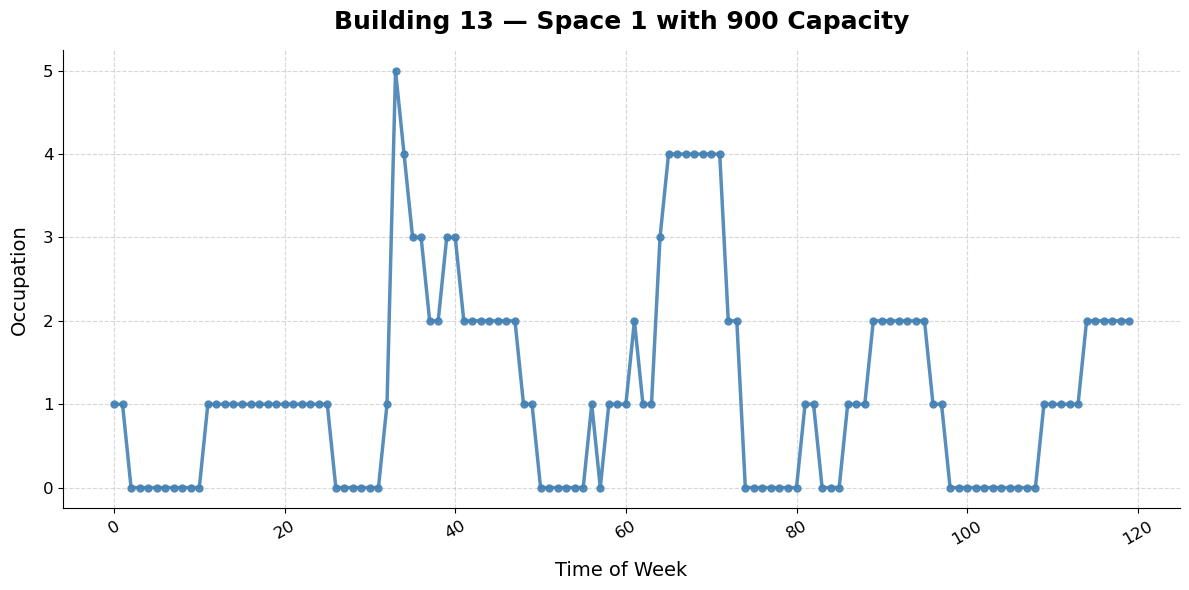

1.1666666666666667


In [9]:
# Time series of Building Space 1 Building 13 

df_13 = df_occ[df_occ["space_name"]== "Space1_Building_13"].reset_index(drop=True)
x = np.arange(df_13["avg_occ"].size)
y = (df_13["avg_occ"])
plt.figure(figsize=(12,6))

# Line plot with markers for clarity
plt.plot(x, y, color="steelblue", linewidth=2.5, marker="o", markersize=5, alpha=0.9)

# Titles & labels
plt.title("Building 13 — Space 1 with 900 Capacity", fontsize=18, fontweight="bold", pad=15)
plt.xlabel("Time of Week", fontsize=14, labelpad=10)
plt.ylabel("Occupation", fontsize=14, labelpad=10)

# Grid for readability
plt.grid(True, linestyle="--", alpha=0.5)

# Axis ticks
plt.xticks(fontsize=12, rotation=30)   # rotate if time labels overlap
plt.yticks(fontsize=12)

# Remove unnecessary spines for clean look
for spine in ["top", "right"]:
    plt.gca().spines[spine].set_visible(False)

plt.tight_layout()
plt.show()
print(np.mean(y))

In [10]:
# Calculate capacity
max_occ_capacity = df_occ.loc[df_occ.groupby(["city","building_name","space_name"])["avg_occ"].idxmax(), 
       ["city","building_name","capacity","space_name","avg_occ"]].reset_index(drop=True)

df_capacity_building = (max_occ_capacity.groupby(["city", "building_name","space_name"])["capacity"].sum().reset_index())
building_names = df_capacity_building["building_name"]
cap_13 = df_capacity_building[df_capacity_building["space_name"] == "Space2_Building_9"]
cap_13

,city,building_name,space_name,capacity
62,Vancouver,Building_9,Space2_Building_9,400


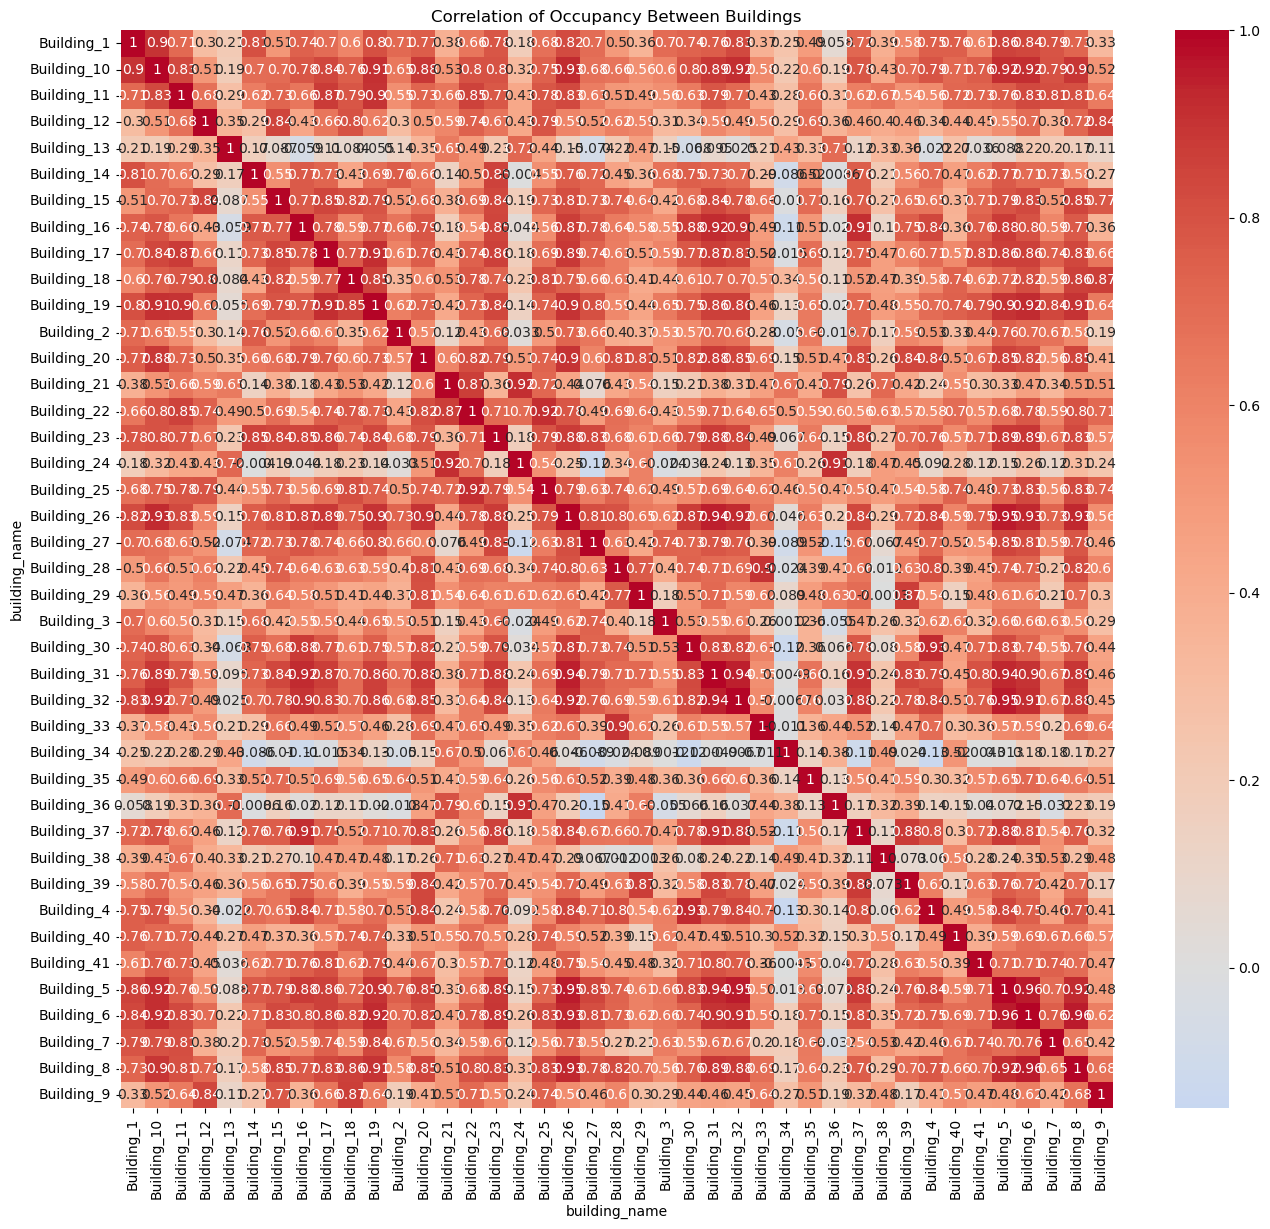

In [11]:
# Correlations for final anamolies 

# Pivot so each building has its own column
df_wide = df_occ.pivot_table(
    index="date_time",
    columns="building_name",
    values="avg_occ"
)
corr_matrix = df_wide.corr()

plt.figure(figsize=(16,14))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation of Occupancy Between Buildings")
plt.show()


Most buildings appear correlated, but this is because of the work scheduel I believe... Building 34 shows a difference compared to rest.

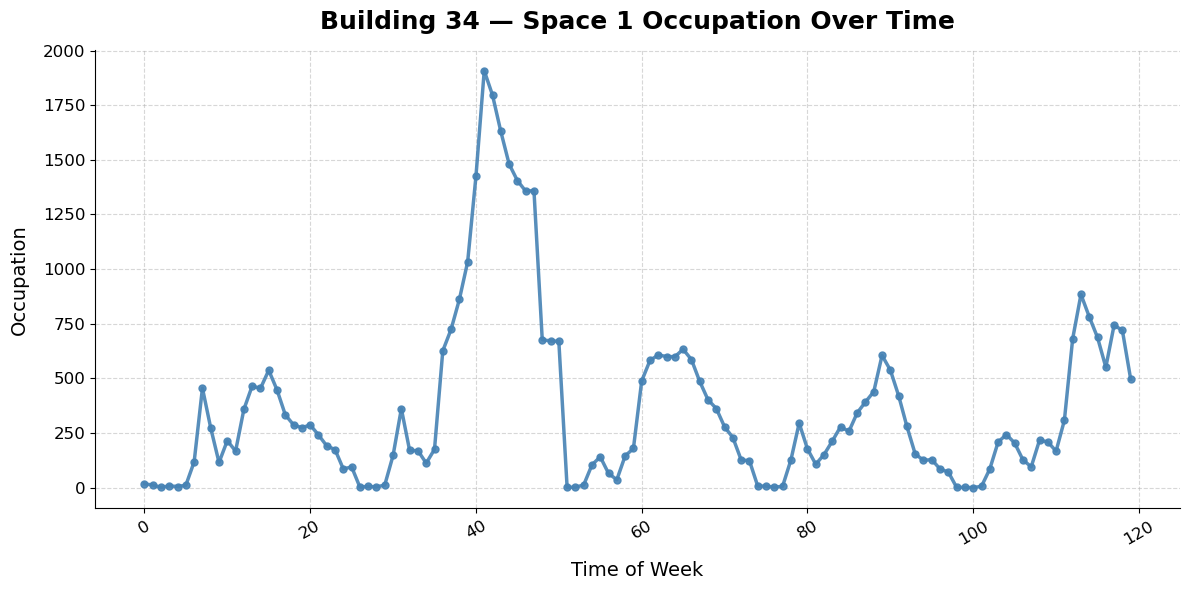

In [12]:
# Time series of Building 34

df_34 = df_occ[df_occ["space_name"]== "Space1_Building_34"].reset_index(drop=True)
x = np.arange(df_34["avg_occ"].size)
y = (df_34["avg_occ"])
plt.figure(figsize=(12,6))

# Line plot with markers for clarity
plt.plot(x, y, color="steelblue", linewidth=2.5, marker="o", markersize=5, alpha=0.9)

# Titles & labels
plt.title("Building 34 — Space 1 Occupation Over Time", fontsize=18, fontweight="bold", pad=15)
plt.xlabel("Time of Week", fontsize=14, labelpad=10)
plt.ylabel("Occupation", fontsize=14, labelpad=10)

# Grid for readability
plt.grid(True, linestyle="--", alpha=0.5)

# Axis ticks
plt.xticks(fontsize=12, rotation=30)   # rotate if time labels overlap
plt.yticks(fontsize=12)

# Remove unnecessary spines for clean look
for spine in ["top", "right"]:
    plt.gca().spines[spine].set_visible(False)

plt.tight_layout()
plt.show()

In [13]:
# Time of Max people_in
time_of_entry = df_occ.loc[df_occ.groupby(["city","building_name","space_name"])["people_in"].idxmax(),
       ["city","building_name","date_time","people_in"]]
time_of_entry["entry_hour"] = np.array(time_of_entry["date_time"].dt.hour)
entry_times = np.array(time_of_entry["date_time"].dt.hour)
df_13 = time_of_entry[time_of_entry["entry_hour"] == 12].reset_index()
df_8 =  time_of_entry[time_of_entry["entry_hour"] == 8]
#time_of_entry["entry_hour"].to_excel("entry_times.xlsx",index=False)


# Time of Max people_out
time_of_exit = df_occ.loc[df_occ.groupby(["city","building_name","space_name"])["people_out"].idxmax(),
       ["city","building_name","date_time","people_out"]]
time_of_exit["exit_hour"] = np.array(time_of_exit["date_time"].dt.hour)
exit_times = np.array(time_of_exit["date_time"].dt.hour)
#time_of_exit["exit_hour"].to_excel("exit_times.xlsx",index=False)


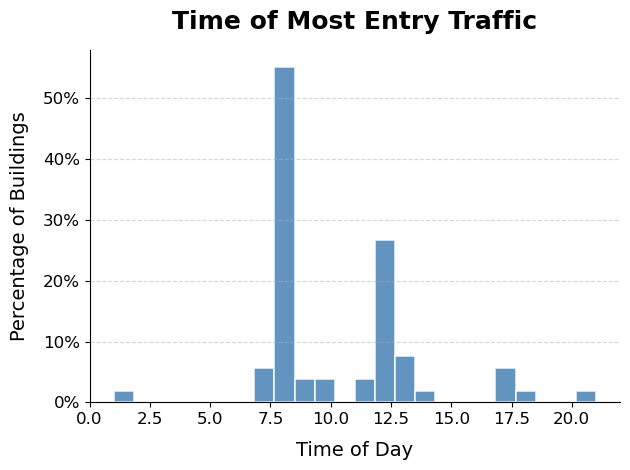

In [14]:
# Histogram normalized to percentages
plt.hist(
    entry_times,
    bins=24,
    density=True,
    color="steelblue",
    edgecolor="white",
    linewidth=1.2,
    alpha=0.85
)

# Format y-axis as %
plt.gca().yaxis.set_major_formatter(lambda x, _: f"{x*100:.0f}%")

# Titles and labels
plt.title("Time of Most Entry Traffic", fontsize=18, fontweight="bold", pad=15)
plt.xlabel("Time of Day", fontsize=14, labelpad=10)
plt.ylabel("Percentage of Buildings", fontsize=14, labelpad=10)

# Grid for readability
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Clean style (remove cluttered spines)
for spine in ["top", "right"]:
    plt.gca().spines[spine].set_visible(False)

plt.tight_layout()
plt.show()